---
#image: ML.png
title: Data Analysis
subtitle: Sample notebook to handle any data for EDA 
date: '2024-01-16'
categories: [Python, Matplotlib, Data Analysis, Pandas, Seaborn]
author: Kunal Khurana
jupyter: python3
toc: True
---

# 1. Introduction

In this exercies, we'll analyse the bank dataset for exploratory and classification techniques.

# 2. Dataset Overview 

## 2.1 Loading Libraries 

In [4]:
# import libraries

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

#import optuna
#import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, median_absolute_error
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
#import lightgbm as lgb
import numpy as np
from scipy import stats

In [51]:
# reading .csv files

train_data = pd.read_csv('train_bank.csv')
test_data = pd.read_csv('test.csv')
orignal_data = pd.read_csv('Churn_Modelling.csv')



## 2.2 Initial Observations and Trends 

In [7]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [10]:
orignal_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [16]:
# checking the number of rows and columns

num_train_rows, num_train_columns = train_data.shape

num_test_rows, num_test_columns = test_data.shape

num_orignal_rows, num_orignal_columns = orignal_data.shape

print('Training Data: ')
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print('Test Data: ')
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns :{num_test_columns}\n")

print("Orignal Data: ")
print(f"Number of Rows: {num_orignal_rows}")
print(f"Number of Columns: {num_orignal_columns}")



Training Data: 
Number of Rows: 165034
Number of Columns: 14

Test Data: 
Number of Rows: 110023
Number of Columns :13

Orignal Data: 
Number of Rows: 10002
Number of Columns: 14


In [21]:
# create a table for missing values, unique values, and data types

missing_values_train = pd.DataFrame({
    'Feature': train_data.columns,
    '[TRAIN] No. of Missing Values' : train_data.isnull().sum().values,
    '[TRAIN] % of Missing Values' : ((train_data.isnull().sum().values)/len(train_data)*100)
})

missing_values_test = pd.DataFrame({
    'Feature' : test_data.columns,
    '[TEST] No. of Missing Values' : test_data.isnull().sum().values,
    '[TEST]% of Missing Values': ((test_data.isnull().sum().values)/len(test_data)*100)
})
                                    
missing_values_orignal = pd.DataFrame({
    'Feature' : orignal_data.columns,
    '[ORIGNAL] No. of Missing Values': orignal_data.isnull().sum().values,
    '[ORIGNAL] % of Missing Values' : ((orignal_data.isnull().sum().values)/len(orignal_data)*100)
})


In [22]:
unique_values = pd.DataFrame({
    'Feature': train_data.columns,
    'No. of Unique Values [FROM TRAIN]' :train_data.nunique().values
})

feature_types = pd.DataFrame({
    'Feature': train_data.columns,
    'DataType': train_data.dtypes
})

In [25]:
merged_df = pd.merge(missing_values_train, missing_values_test, on= 'Feature', how= 'left')
merged_df = pd.merge(merged_df, missing_values_orignal, on = 'Feature', how = 'left')
merged_df = pd.merge(merged_df, unique_values, on= 'Feature', how= 'left')
merged_df = pd.merge(merged_df, feature_types, on = 'Feature', how= 'left')

merged_df

,Feature,[TRAIN] No. of Missing Values,[TRAIN] % of Missing Values,[TEST] No. of Missing Values,[TEST]% of Missing Values,[ORIGNAL] No. of Missing Values,[ORIGNAL] % of Missing Values,No. of Unique Values [FROM TRAIN],DataType
0,id,0,0.0,0.0,0.0,NaN,NaN,165034,int64
1,CustomerId,0,0.0,0.0,0.0,0.0,0.000000,23221,int64
2,Surname,0,0.0,0.0,0.0,0.0,0.000000,2797,object
3,CreditScore,0,0.0,0.0,0.0,0.0,0.000000,457,int64
4,Geography,0,0.0,0.0,0.0,1.0,0.009998,3,object
5,Gender,0,0.0,0.0,0.0,0.0,0.000000,2,object
6,Age,0,0.0,0.0,0.0,1.0,0.009998,71,float64
7,Tenure,0,0.0,0.0,0.0,0.0,0.000000,11,int64
8,Balance,0,0.0,0.0,0.0,0.0,0.000000,30075,float64
9,NumOfProducts,0,0.0,0.0,0.0,0.0,0.000000,4,int64


In [26]:
# count duplicate rows in train_data
train_duplicates = train_data.duplicated().sum()

# count duplicate rows in test_data
test_duplicates = test_data.duplicated().sum()

# count duplicate rows in orignal_data
orignal_duplicates = orignal_data.duplicated().sum()

# print results
print(f"Number of duplicate rows in train_data: {train_duplicates}")
print(f"Number of duplicate rows in test_data: {test_duplicates}")
print(f"Number of duplicate rows in orignal_data: {orignal_duplicates}")

Number of duplicate rows in train_data: 0
Number of duplicate rows in test_data: 0
Number of duplicate rows in orignal_data: 2


In [31]:
# description of all numerical columns in the dataset
train_data.describe().T
#test_data.describe().T
#orignal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


#  3. EDA 

In [32]:
numerical_variables = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
target_variable = 'Exited'
categorical_variables = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

## 3.1 Numerical Features

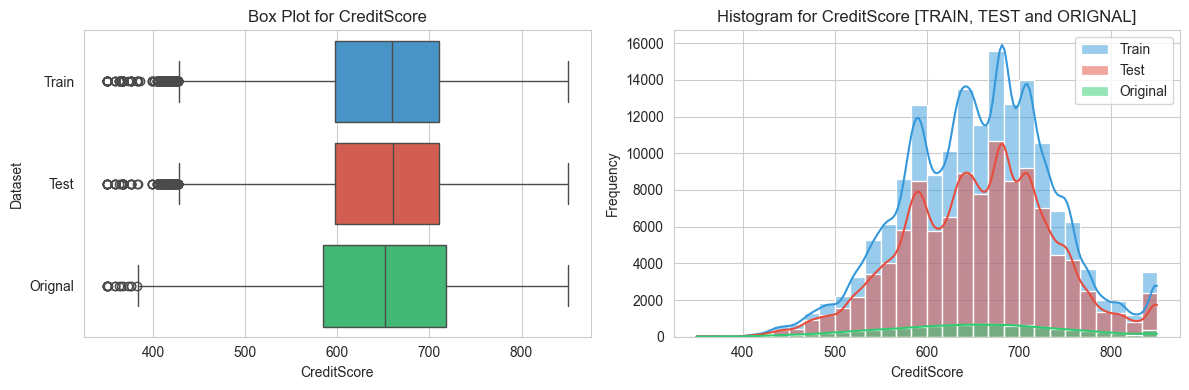

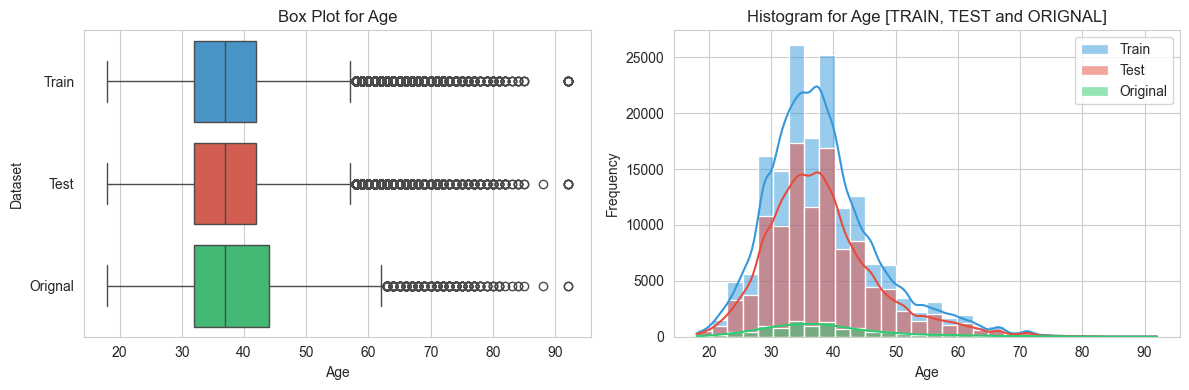

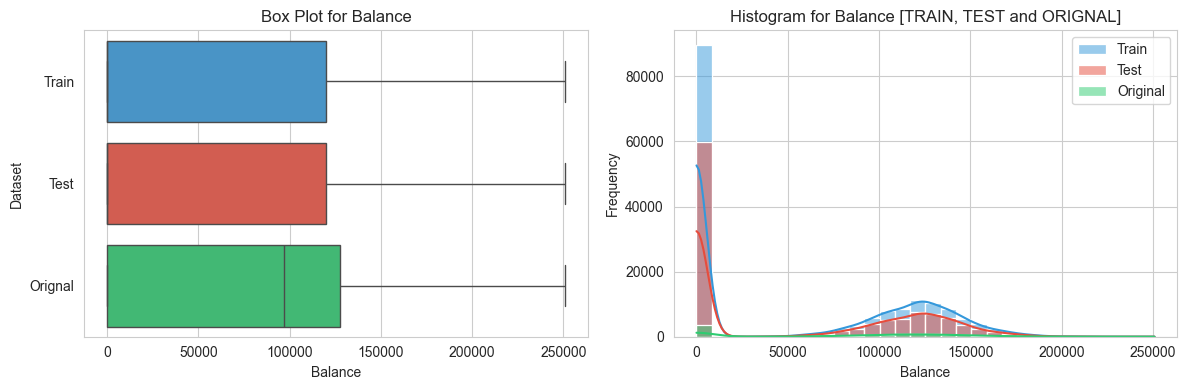

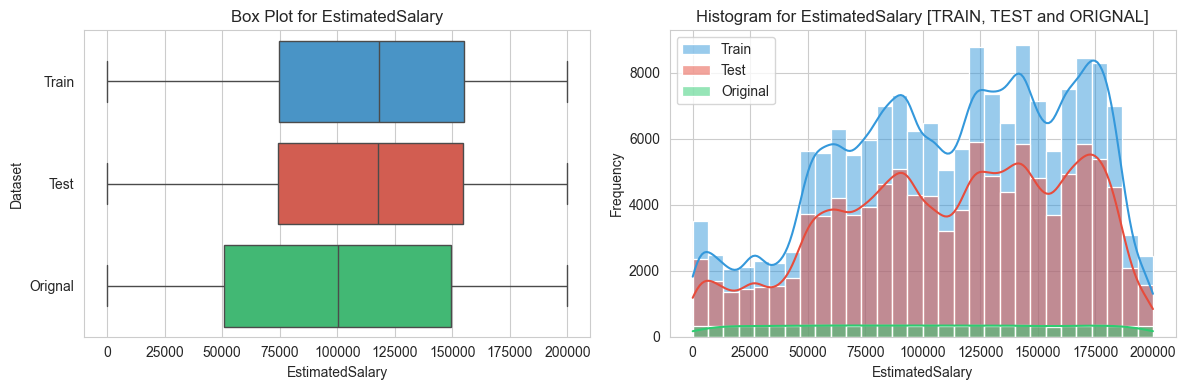

In [43]:
# Analysis

# custom color pallete define
custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# add 'Dataset' column to distinguish between train and test data
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'
orignal_data['Dataset']= 'Orignal'

variables = [col for col in train_data.columns if col in numerical_variables]

# function to create and display a row of plots for a single variable
def create_variable_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1,2, figsize= (12, 4))
    
    #Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data = pd.concat([
        train_data, test_data, orignal_data.dropna()
    ]), 
    x= variable, y = "Dataset", palette= custom_palette)
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")
    
    # Seperate Histograms
    plt.subplot(1,2,2)
    sns.histplot(data = train_data, x = variable, color= custom_palette[0], kde= True, bins= 30, label= 'Train')
    sns.histplot(data = test_data, x= variable, color= custom_palette[1], kde= True, bins= 30, label= 'Test')
    sns.histplot(data = orignal_data.dropna(), x=variable, color=custom_palette[2], kde=True, bins=30, label="Original")
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {variable} [TRAIN, TEST and ORIGNAL]')
    plt.legend()
    
    #adjust spacing between subplots
    plt.tight_layout()
    
    # show the plots
    plt.show()

# perform univariate analysis for each variable
for variable in variables:
    create_variable_plots(variable)
    
# drop the 'Dataset' column after analysis
train_data.drop('Dataset', axis=1, inplace = True)
test_data.drop('Dataset', axis=1, inplace= True)
orignal_data.drop('Dataset', axis=1, inplace=True)

## 3.2 Categorical features 

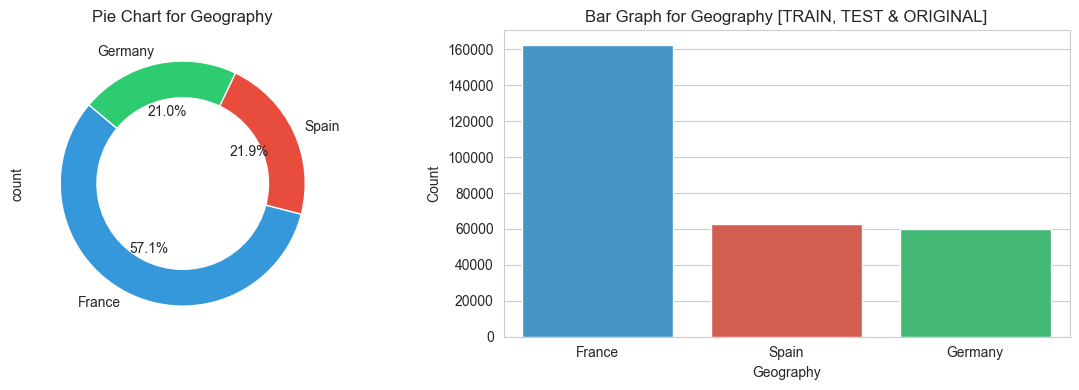

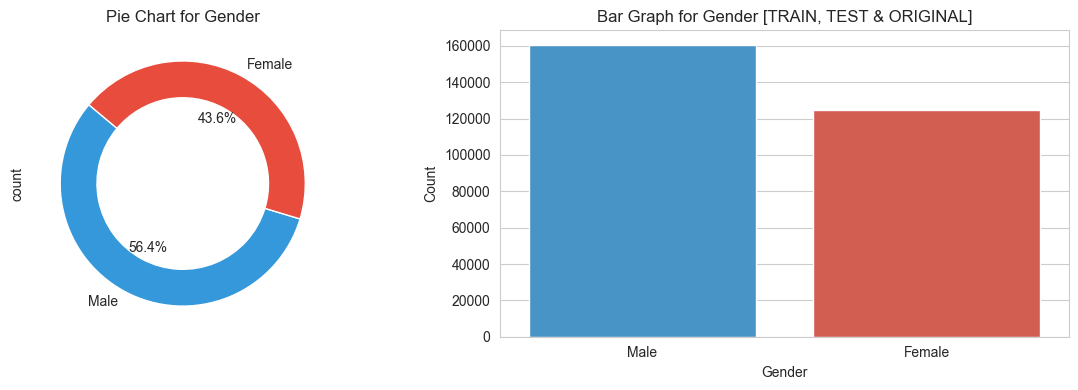

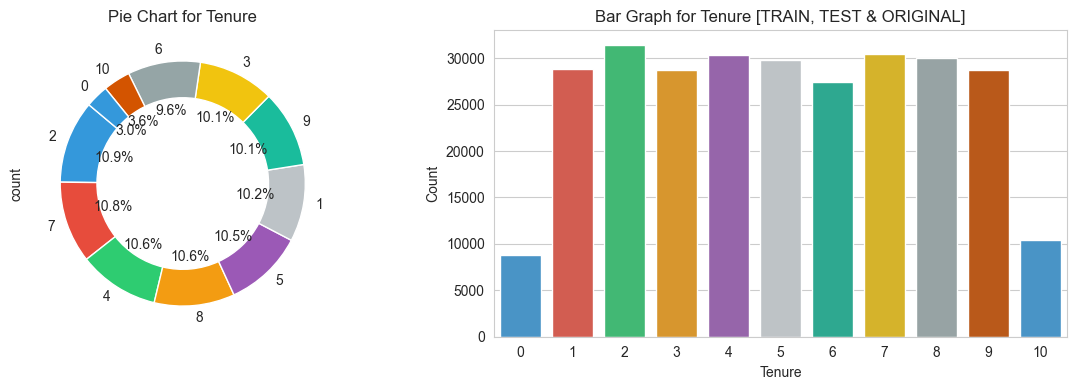

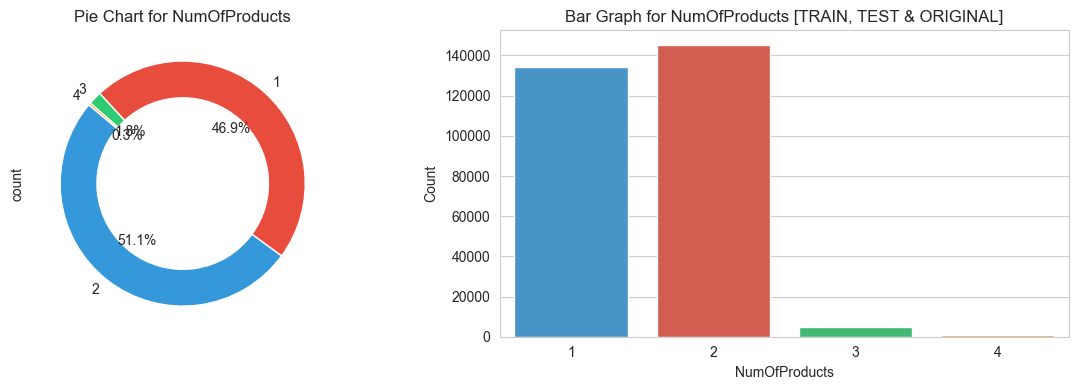

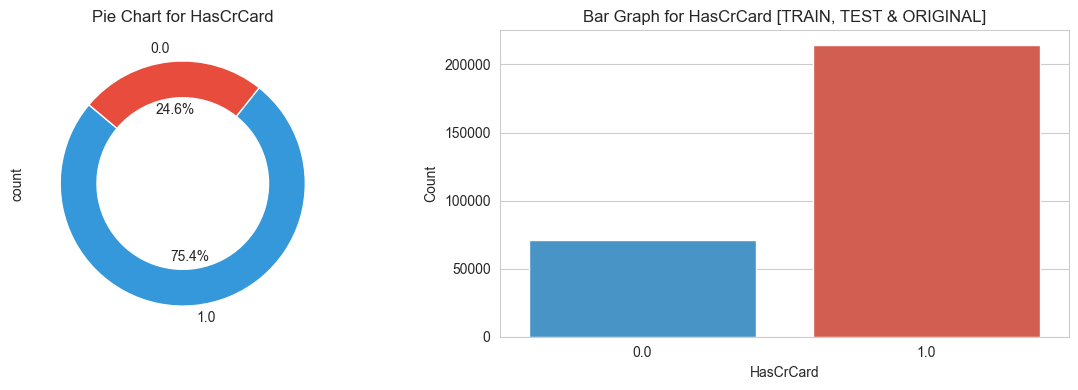

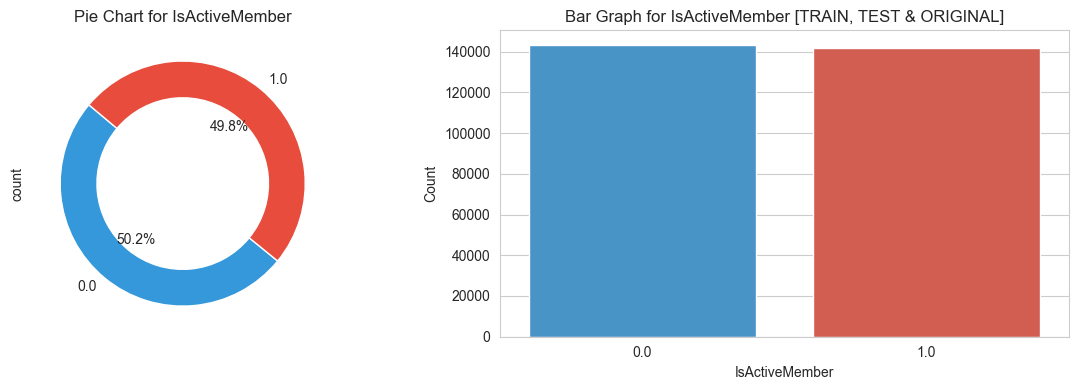

In [49]:
# Analysis of all CATEGORICAL features

# Define a custom color palette for categorical features
categorical_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#bdc3c7', '#1abc9c', '#f1c40f', '#95a5a6', '#d35400']

# List of categorical variables
categorical_variables = [col for col in categorical_variables]

# Function to create and display a row of plots for a single categorical variable
def create_categorical_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Pie Chart
    plt.subplot(1, 2, 1)
    train_data[variable].value_counts().plot.pie(autopct='%1.1f%%',
                                                 colors=categorical_palette, 
                                                 wedgeprops=dict(width=0.3), 
                                                 startangle=140)
    plt.title(f"Pie Chart for {variable}")

    # Bar Graph
    plt.subplot(1, 2, 2)
    sns.countplot(data=pd.concat([
        train_data, test_data, orignal_data.dropna()
    ]), x=variable, palette=categorical_palette)
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Bar Graph for {variable} [TRAIN, TEST & ORIGINAL]")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each categorical variable
for variable in categorical_variables:
    create_categorical_plots(variable)

## 3.3 Target features 

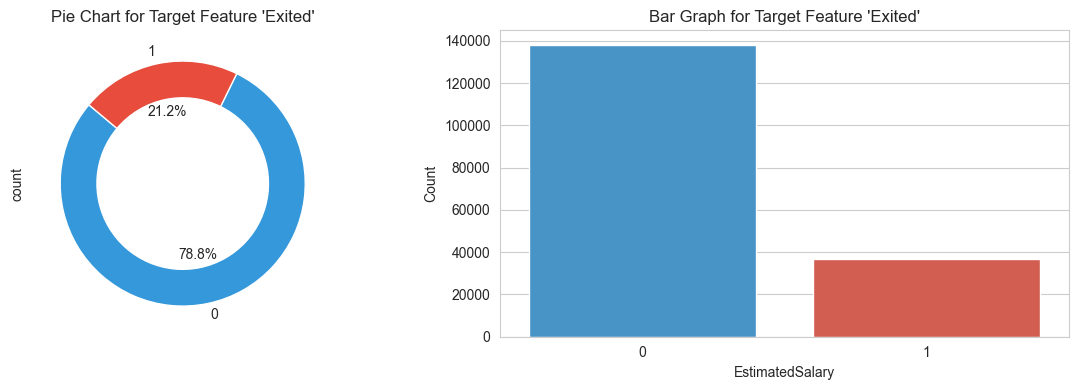

In [47]:
# Analysis of TARGET feature

# Define a custom color palette for categorical features
target_palette = ['#3498db', '#e74c3c']

fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Pie Chart
plt.subplot(1,2,1)
train_data[target_variable].value_counts().plot.pie(
    autopct='%1.1f%%', colors= target_palette, 
    wedgeprops=dict(width=0.3), startangle=140
)
plt.title(f"Pie Chart for Target Feature 'Exited'")

# Bar Graph
plt.subplot(1,2,2)
sns.countplot(data=pd.concat([
    train_data, orignal_data.dropna()
]),
              x=target_variable, palette=target_palette)
plt.xlabel(variable)
plt.ylabel('Count')
plt.title(f"Bar Graph for Target Feature 'Exited'")

# adjust spacing
plt.tight_layout()

# show
plt.show()

## 3.4 Bivariate Analysis

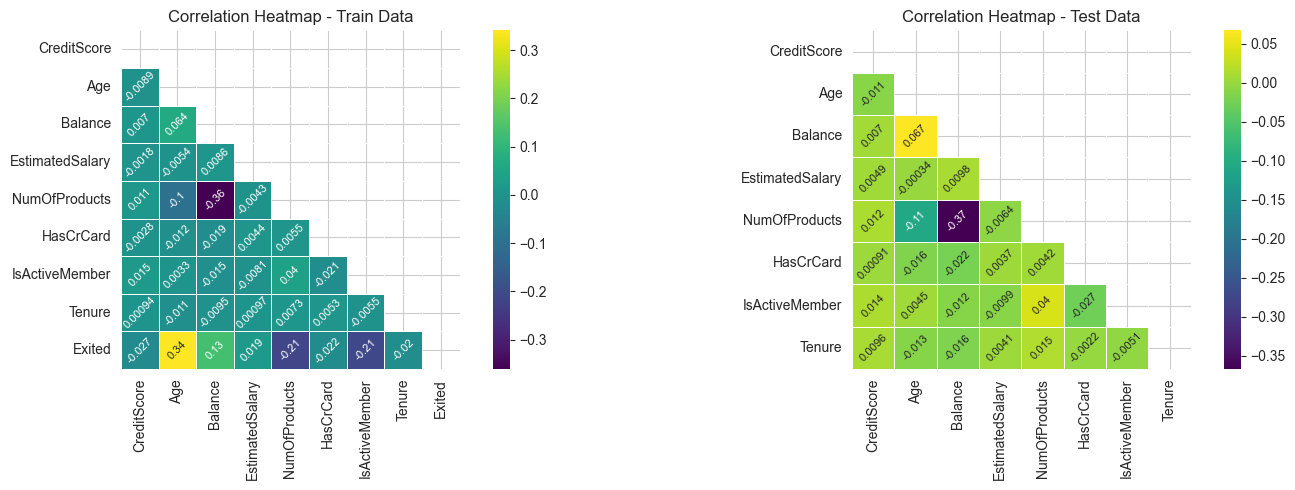

In [50]:
variables = [col for col in train_data.columns if col in numerical_variables]

cat_variables_train = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure', 'Exited']
cat_variables_test = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure']

# Adding variables to the existing list
train_variables = variables + cat_variables_train
test_variables = variables + cat_variables_test

# Calculate correlation matrices for train_data and test_data
corr_train = train_data[train_variables].corr()
corr_test = test_data[test_variables].corr()

# Create masks for the upper triangle
mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
mask_test = np.triu(np.ones_like(corr_test, dtype=bool))

# Set the text size and rotation
annot_kws = {"size": 8, "rotation": 45}

# Generate heatmaps for train_data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax_train = sns.heatmap(corr_train, mask=mask_train, cmap='viridis', annot=True,
                      square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Train Data')

# Generate heatmaps for test_data
plt.subplot(1, 2, 2)
ax_test = sns.heatmap(corr_test, mask=mask_test, cmap='viridis', annot=True,
                     square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Test Data')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()